In [ ]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("https://raw.githubusercontent.com/abdullabasim/dataset/main/Titanic-train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("https://raw.githubusercontent.com/abdullabasim/dataset/main/Titanic-test.csv")

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.isnull().sum()

train_data = train_df.copy()

In [ ]:
print("Percentage of null age is ", round((train_data['Age'].isnull().mean()) * 100,2))

Percentage of null age is  19.87


Mean imputation works better if the distribution is normally-distributed or has a Gaussian distribution, while median imputation is preferable for skewed distribution(be it right or left).

<AxesSubplot:xlabel='Age', ylabel='Count'>

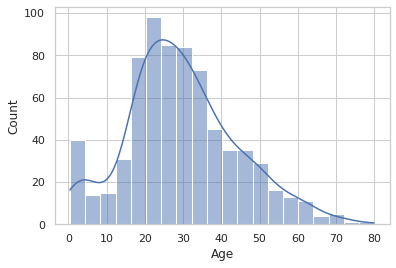

In [ ]:
sns.histplot(data=train_data,x='Age',kde=True)

In [ ]:
train_data['Age'].fillna(train_data['Age'].median(skipna=True),inplace=True)
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print("Percentage of null Cabin is ", round((train_data['Cabin'].isnull().sum()/len(train_data)) * 100,2))

Percentage of null Cabin is  77.1


In [ ]:
train_data.drop("Cabin",axis=1,inplace=True)

In [ ]:
print("Percentage of null Embarked is ", round((train_data['Embarked'].isnull().sum()/len(train_data)) * 100,2))

Percentage of null Embarked is  0.22


In [1]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

train_data.head()

NameError: ignored

Create categorical variable for traveling alone

In [ ]:
train_data['TravelAlone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0,0,1)
train_data.drop(['SibSp','Parch'],axis=1,inplace=True)



Delete unwanted features

In [ ]:
train_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
trainning = pd.get_dummies(train_data,columns=['Sex','Embarked'],drop_first=True)

In [ ]:
trainning.head()

,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,1
1,1,1,38.0,71.2833,0,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,0,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


Now, apply the same changes to the test data

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data,columns=['Sex','Embarked'],drop_first=True)

testing.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)


In [ ]:
testing.head()

,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,7.8292,1,1,1,0
1,3,47.0,7.0000,0,0,0,1
2,2,62.0,9.6875,1,1,1,0
3,3,27.0,8.6625,1,1,0,1
4,3,22.0,12.2875,0,0,0,1


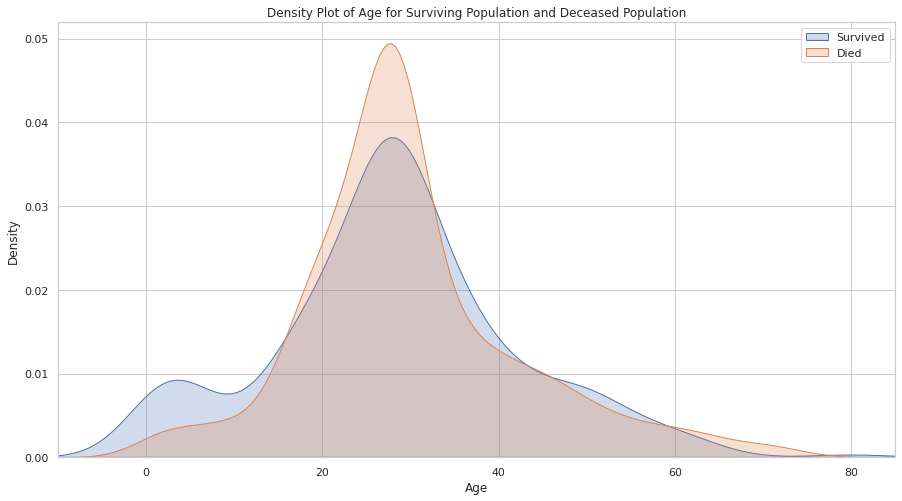

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(trainning["Age"][trainning.Survived == 1],  shade=True)
sns.kdeplot(trainning["Age"][trainning.Survived == 0],  shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

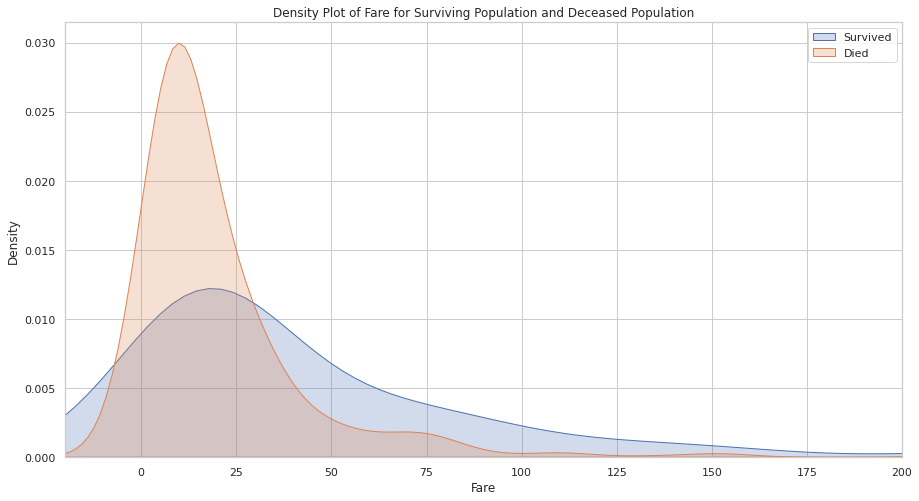

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(trainning["Fare"][trainning.Survived == 1],  shade=True)
sns.kdeplot(trainning["Fare"][trainning.Survived == 0],  shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

In [ ]:
trainning[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

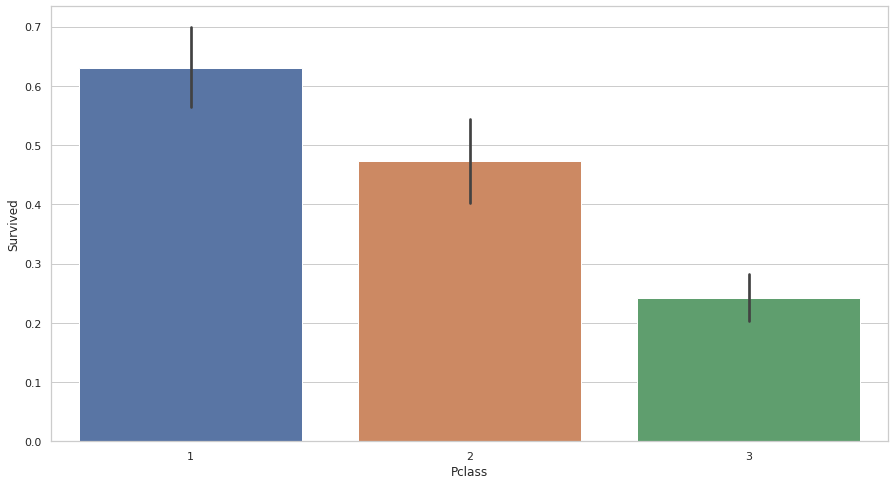

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="Pclass",y="Survived",data=trainning)

In [ ]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by = 'Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

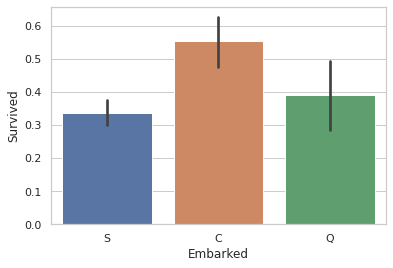

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=train_df)

In [ ]:
trainning[['TravelAlone','Survived']].groupby(['TravelAlone']).mean().sort_values(by = 'Survived',ascending=False)

,Survived
TravelAlone,
0,0.505650
1,0.303538


<AxesSubplot:xlabel='TravelAlone', ylabel='Survived'>

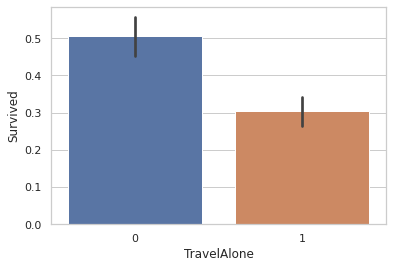

In [ ]:
sns.barplot(x='TravelAlone', y='Survived', data=trainning)

In [ ]:
train_df[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by = 'Survived' ,ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

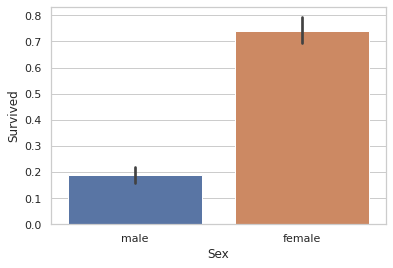

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train_df)

Recursive feature elimination

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
cols = trainning.columns
cols = [ 'Pclass', 'Age', 'Fare', 'TravelAlone', 'Sex_male','Embarked_Q', 'Embarked_S']
X = trainning[cols]
y = trainning['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model,  n_features_to_select=5)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Pclass', 'Age', 'TravelAlone', 'Sex_male', 'Embarked_S']


Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

In [ ]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))



Optimal number of features: 6
Selected features: ['Pclass', 'Age', 'TravelAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']


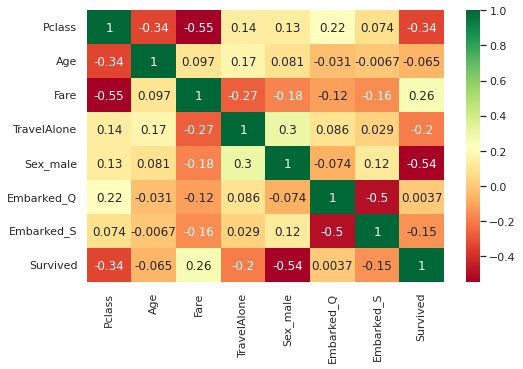

In [ ]:
Selected_features = [ 'Pclass', 'Age', 'Fare', 'TravelAlone', 'Sex_male','Embarked_Q', 'Embarked_S','Survived']
X = trainning[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.777
LogisticRegression log_loss is 0.508
LogisticRegression auc is 0.836


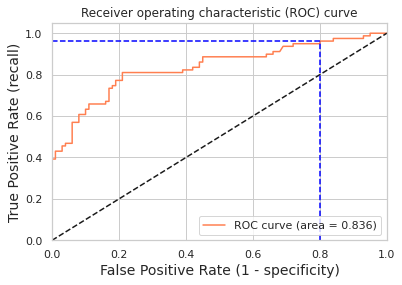

Using a threshold of 0.066 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = trainning[[ 'Pclass', 'Age', 'Fare', 'TravelAlone', 'Sex_male','Embarked_Q', 'Embarked_S']]
y = trainning['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# check classification scores of logistic regression
logreg = LogisticRegression(C=100, solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Model evaluation based on K-fold cross-validation using `cross_val_score()` function

In [ ]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression(C = 0.10001, random_state=0)
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.796
LogisticRegression average log_loss is 0.464
LogisticRegression average auc is 0.845


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=0.10001))])
best params: {'clf__C': 0.10001}
best score: 0.7961785198669261


In [ ]:
testing['Survived'] = log_clf.predict(testing[[ 'Pclass', 'Age', 'Fare', 'TravelAlone', 'Sex_male','Embarked_Q', 'Embarked_S']])
testing['PassengerId'] = test_df['PassengerId']

submission = testing[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
